This kernal was modeled after Nagesh Singh Chauhan's work, which can be read here:
https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

# Multiple Linear Regression

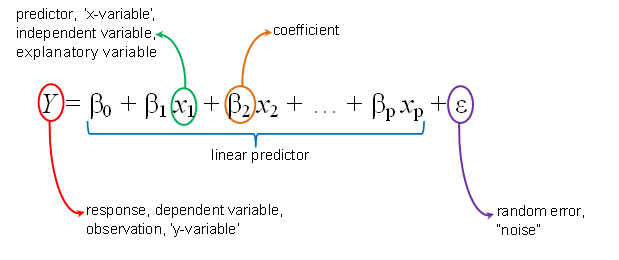

In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [ ]:
dataset = pd.read_csv("../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

In [ ]:
dataset

In [ ]:
dataset.describe()

In [ ]:
dataset.isnull().sum()  #yay, no NaN values to fill!

In [ ]:
X = dataset[['fixed acidity', 'volatile acidity', 'citric acid', 
             'residual sugar', 'chlorides', 'free sulfur dioxide', 
             'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values

y = dataset['quality'].values

In [ ]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['quality'])

We can see that the quality scores are centered around 5 and 6.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
coeff_df = pd.DataFrame({'Coefficient': regressor.coef_})
coeff_df.index = [['fixed acidity', 'volatile acidity', 'citric acid', 
                   'residual sugar', 'chlorides', 'free sulfur dioxide', 
                   'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']]
coeff_df

This means that for a unit increase in “density”, there is a decrease of 31.51 units in the quality of the wine. Similarly, a unit decrease in “Chlorides“ results in an increase of 1.87 units in the quality of the wine. We can see that the rest of the features have very little effect on the quality of the wine.

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

In [ ]:
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

We can see a bar to bar comparison of our predicted vs actual wine quality. (for the first 25 values in our test set)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

We see that the value of root mean squared error is 0.62, which is slightly greater than 10% of the mean value which is 5.63. This means that our algorithm was not very accurate but can still make reasonably good predictions.

There are many factors that may have contributed to this inaccuracy, for example :

* Need more data: We need to have a huge amount of data to get the best possible prediction.

* Bad assumptions: We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help you determine that.

* Poor features: The features we used may not have had a high enough correlation to the values we were trying to predict.